In [1]:
#Importación de las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
# Cargar el dataset
data = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
# Exploración de los registros
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Verificar si hay valores faltantes
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Estadísticas descriptivas
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [6]:
# Convertir la variable Gender de string a numeric
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [7]:
# Normalizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])

In [8]:
# Paso 4: Entrenar el modelo K-means
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5, random_state=42)

In [9]:
# Paso 5: Evaluar el desempeño del modelo
# Coeficiente de Silhouette
silhouette_score_kmeans = silhouette_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans_model.labels_)
print("Coeficiente de Silhouette para K-means:", silhouette_score_kmeans)

Coeficiente de Silhouette para K-means: 0.553931997444648


In [10]:
# Índice de Calinski-Harabasz
calinski_harabasz_score_kmeans = calinski_harabasz_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans_model.labels_)
print("Índice de Calinski-Harabasz para K-means:", calinski_harabasz_score_kmeans)

Índice de Calinski-Harabasz para K-means: 247.35899338037288


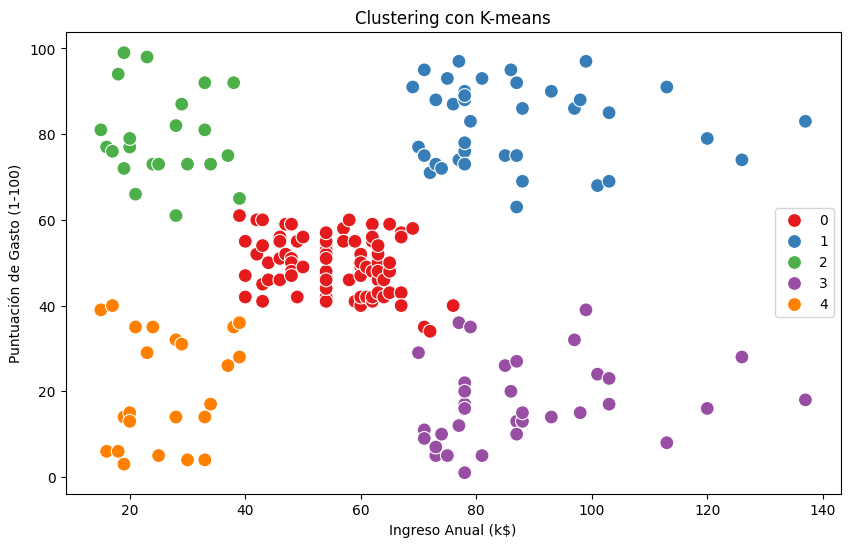

In [11]:
# Paso 6: Visualización de resultados
# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue=kmeans_model.labels_, palette='Set1', s=100)
plt.title('Clustering con K-means')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.show()

In [12]:
# Crear un imputador para reemplazar los NaN con la media de la columna
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data_imputed = imputer.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])
data_imputed_df = pd.DataFrame(data_imputed, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

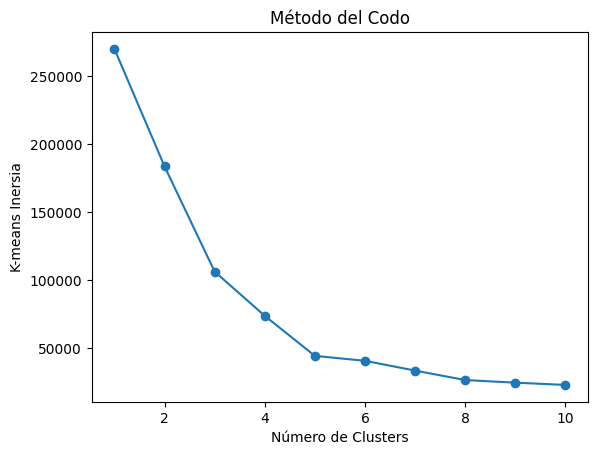

In [13]:
# Metodo del codo para observar cuantos cluster son necesarios
k_num = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, tol= 1e-04, random_state=42)
    km.fit(data_imputed)
    k_num.append(km.inertia_)

# Graficamos para observar
plt.plot(range(1, 11), k_num, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('K-means Inersia')
plt.show()

In [14]:
# Entrenamiento del nuevo data
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(data_imputed_df)

KMeans(n_clusters=5, random_state=42)

In [15]:
# Aplicación de KMeans
Kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, tol= 1e-04, random_state=42)
Kmeans.fit(data_imputed_df)

# Centroides y etiquetas
centroide = Kmeans.cluster_centers_
labels = Kmeans.labels_
print(centroide)


[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


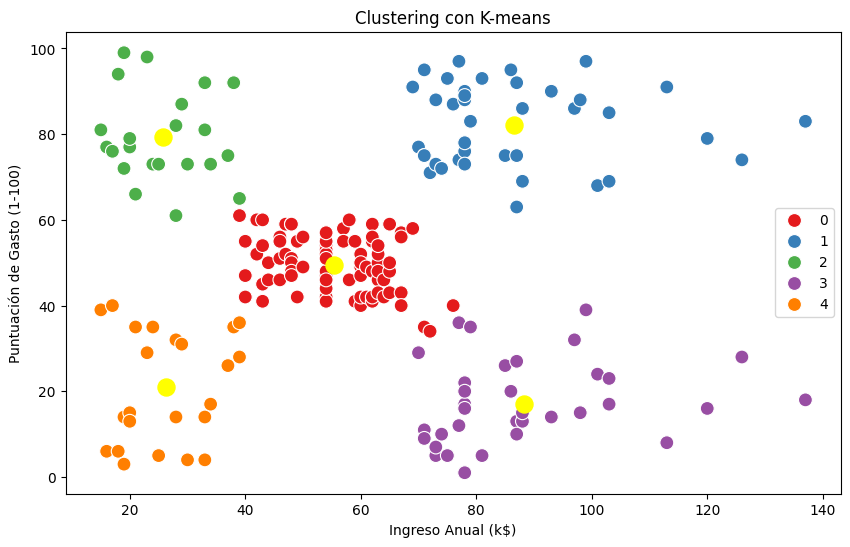

In [16]:
# Graficamos identificando los clústers elegidos y los centorides
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue=labels, palette='Set1', s=100)
plt.scatter(centroide[:, 0], centroide[:, 1], s=150, c='yellow')
plt.title('Clustering con K-means')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.show()
